In [4]:
# Warmup 1:  Match each of these SQL terms to the aspects of the database they narrow

# SQL Commands:  
# the SELECT command narrows our data based on    ____________
# the FROM command narrows our data based on      ____________
# the WHERE command narrows our data based on     ____________
# the LIMIT command narrows our data based on     ____________


# Choose one of the following:  Table, Row(s), Column(s)



In [5]:
# Warmup #2: Make a connection to the movies.db

import os, sqlite3, pandas as pd

# We are going to use this database
file_name = "movies.db"

# assert that the database exists in your current directory (why is this important?)
assert os.path.exists(file_name)

# make a connection to our database using sqlite3
con = sqlite3.connect(file_name) # None
print(con)

# notice that con is an object....the 0x is the hexadecimal address where it lives on the heap


### Lecture 35: Aggregating and Grouping in SQL
**Learning Objectives:**
    
35.1 Use SQL Aggregate functions to summarize database columns:  SUM, AVG, COUNT, MIN, MAX, DISTINCT

35.2 Use the GROUP BY command to place database rows into buckets.

35.3 Use the HAVING command to apply conditions to groups.

35.4 Answer questions about a database using SQL commands with multiple parts in the correct order.



In [6]:
# this query shows us what we have to work with:
pd.read_sql("select * from sqlite_master", con)

# note that movies is the name of the database, and also the name of the table

,type,name,tbl_name,rootpage,sql
0,table,movies,movies,2,"CREATE TABLE ""movies"" (\n""Title"" TEXT,\n ""Dir..."


In [17]:
# modify this query to show the **first 5 rows** of all the columns in movies
query = """
    SELECT *  
    FROM movies  
"""
pd.read_sql(query, con)

,Title,Director,Year,Runtime,Rating,Revenue
0,Guardians of the Galaxy,James Gunn,2014,121,8.1,333.13
1,Prometheus,Ridley Scott,2012,124,7.0,126.46
2,Split,M. Night Shyamalan,2016,117,7.3,138.12
3,Sing,Christophe Lourdelet,2016,108,7.2,270.32
4,Suicide Squad,David Ayer,2016,123,6.2,325.02


In [8]:
# show the Title, Rating, and Runtime of the top 10 movies with the highest rating
# if the rating is the same, **choose the smaller runtime**
query = """
    SELECT Title, Rating, Runtime
    FROM movies

"""
pd.read_sql(query, con)

,Title,Rating,Runtime
0,The Dark Knight,9.0,152
1,Inception,8.8,148
2,Dangal,8.8,161
3,Kimi no na wa,8.6,106
4,The Intouchables,8.6,112
5,Interstellar,8.6,169
6,Whiplash,8.5,107
7,The Prestige,8.5,130
8,The Lives of Others,8.5,137
9,The Departed,8.5,151


In [9]:
# what were the top 3 movies in terms of revenue in 2013?
# show just the Title, Year, and Reveue columns
query = """
    SELECT Title, Year, Revenue
    FROM movies
    
    LIMIT 3
"""
pd.read_sql(query, con)

,Title,Year,Revenue
0,The Hunger Games: Catching Fire,2013,424.65
1,Iron Man Three,2013,408.99
2,Frozen,2013,400.74


In [36]:
# We can rename a column using the word AS

query = """
    SELECT Title, Revenue AS "$ MILLIONS"
    FROM movies
    ORDER BY Revenue DESC
    LIMIT 3
"""
pd.read_sql(query, con)


,Title,$ MILLIONS
0,Star Wars: Episode VII - The Force Awakens,936.63
1,Avatar,760.51
2,Jurassic World,652.18


## We can use simple math functions on a column
- SUM, AVG, COUNT, MIN, MAX 
- note that these are all single-pass calculations
- put this in the SELECT command
- can qualify it with DISTINCT


In [35]:
# find the avg Runtime of a movie...don't need the other commands
query = """
    SELECT *
    FROM movies
"""
pd.read_sql(query, con)

# can also round it similar to Python rounding ROUND(AVG(Runtime), 1)

,AVG(Runtime)
0,113.170341


In [54]:
#What is the average runtime of movies with a rating above average? 

query = """
    SELECT *
    FROM movies
"""
pd.read_sql(query, con)



,AVG(RUNTIME)
0,119.005859


In [43]:
# find the count of the movies where runtime > 120

query = """
    SELECT COUNT(*) AS "count (runtime > 120)"
    FROM movies
    WHERE Runtime > 120
"""
pd.read_sql(query, con)

,count (runtime > 120)
0,289


In [36]:
# what is the count of distinct directors?
query = """
    SELECT count(DISTINCT Director)
    FROM movies
"""
pd.read_sql(query, con)

,count(DISTINCT Director)
0,643


In [48]:
# What is the average rating and revenue of movies longer than 120 minutes? 

query = """


"""
pd.read_sql(query, con)

,AVG(RATING),AVG(REVENUE)
0,7.168512,118.681799


In [47]:
# What is the average rating and revenue of movies less than or equal to 120 minutes? 

query = """


"""
pd.read_sql(query, con)

,AVG(RATING),AVG(REVENUE)
0,6.542031,53.478717


In [49]:
# What percentage of the total revenue from 2016 came from the highest revenue movie?

query = """
    SELECT MAX(revenue) / SUM(revenue) * 100 AS percentage
    FROM movies
"""
pd.read_sql(query, con)

,percentage
0,1.296994


### GROUP BY allows you to put rows into buckets
- Place it between FROM and ORDER BY

In [38]:
# what is the average Runtime and Revenue by year ?
query = """
    SELECT Year, AVG(Runtime) , AVG(Revenue)
    FROM movies
    GROUP BY YEAR
    ORDER BY YEAR ASC
"""
pd.read_sql(query, con)

,Year,AVG(Runtime),AVG(Revenue)
0,2006,120.840909,82.374091
1,2007,121.622642,81.249623
2,2008,110.826923,97.177308
3,2009,116.117647,103.769804
4,2010,111.133333,99.827500
5,2011,114.603175,86.221587
6,2012,119.109375,107.973281
7,2013,116.133333,83.824556
8,2014,114.489796,81.606122
9,2015,114.496063,69.717480


In [61]:
# what is the average Runtime and Revenue by year for 2010 to 2016
query = """
    SELECT YEAR, AVG(RUNTIME) , AVG(revenue)
    FROM (select * from movies where year >= 2010 and year <= 2016)
    GROUP BY YEAR
    ORDER BY YEAR ASC
"""
pd.read_sql(query, con)

,Year,AVG(RUNTIME),AVG(revenue)
0,2010,111.133333,99.827500
1,2011,114.603175,86.221587
2,2012,119.109375,107.973281
3,2013,116.133333,83.824556
4,2014,114.489796,81.606122
5,2015,114.496063,69.717480
6,2016,107.337838,37.877196


In [41]:
# Who are the top 5 Directors that had the most movies earning *over 100M dollars*?

query = """
    SELECT Director, Count(*)
    FROM MOVIES

    LIMIT 5

"""
pd.read_sql(query, con)

,Director,Count(*)
0,Zack Snyder,4
1,Wes Ball,1
2,Walt Dohrn,1
3,Tony Gilroy,1
4,Tom McGrath,1


### The HAVING command allows you to put conditions on Groups
- goes after the GROUP BY commmand

In [42]:
# for all directors with at least 3 movies, find the 10 directors with the top avg ratings
query = """
    SELECT director, AVG(rating) AS rating, COUNT(*) as count
    FROM movies
    GROUP BY director

    ORDER BY rating DESC
    LIMIT 10
"""
pd.read_sql(query, con)

,Director,rating,count
0,Christopher Nolan,8.680000,5
1,Martin Scorsese,7.920000,5
2,Quentin Tarantino,7.900000,4
3,Wes Anderson,7.900000,3
4,David Fincher,7.820000,5
5,Alejandro González Iñárritu,7.766667,3
6,Denis Villeneuve,7.760000,5
7,Matthew Vaughn,7.725000,4
8,Clint Eastwood,7.700000,4
9,Steve McQueen,7.633333,3


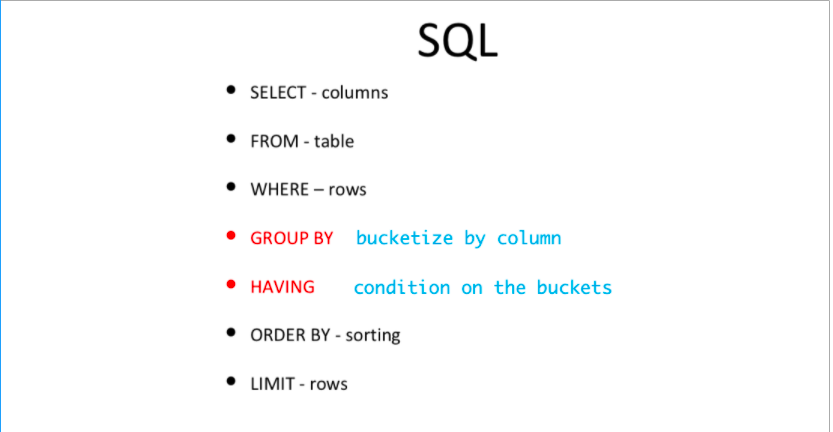

In [60]:
# Which *directors* have had *more than 3 movies* that have been *since 2012*?

query = """
    SELECT director, COUNT(*) AS movies
    FROM movies

    GROUP BY director

"""
pd.read_sql(query, con)

,Director,movies
0,Antoine Fuqua,4
1,Denis Villeneuve,4
2,Mike Flanagan,4
3,Peter Berg,4
4,Ridley Scott,4


In [96]:
# DON'T FORGET TO CLOSE YOUR CONNECTION
con.close()

## PRACTICE: SURVEY DATA

In [84]:
# open a connection to survey.db
db_name = 'survey.db'
assert os.path.exists(db_name)
conn = sqlite3.connect(db_name)
conn

In [85]:
# what is the name of the table?
pd.read_sql("select * from sqlite_master", conn)

,type,name,tbl_name,rootpage,sql
0,table,fall_2021,fall_2021,2,"CREATE TABLE ""fall_2021"" (\n""index"" INTEGER,\n..."
1,index,ix_fall_2021_index,fall_2021,3,"CREATE INDEX ""ix_fall_2021_index""ON ""fall_2021..."


In [86]:
# What is all the data?

query = """
    SELECT *
    FROM fall_2021
"""

pd.read_sql(query, conn)

,index,lecture,age,major,topping
0,0,LEC001,19.0,Computer Science,basil/spinach
1,1,LEC002,18.0,Engineering,pineapple
2,2,LEC003,19.0,Business,pepperoni
3,3,LEC003,19.0,Engineering,Other
4,4,LEC001,19.0,Data Science,sausage
...,...,...,...,...,...
891,891,LEC001,19.0,Data Science,pepperoni
892,892,LEC001,20.0,Data Science,pepperoni
893,893,LEC004,21.0,Computer Science,pepperoni
894,894,LEC001,19.0,Engineering,tomato


In [88]:
# 1.) How many people in LEC 003 are in Engineering

query = """

"""

pd.read_sql(query, conn)

,count(*)
0,88


In [90]:
# 2.) How many people in each major?

query = """

"""

pd.read_sql(query, conn)

,major,count(*)
0,AMEP,2
1,Accounting,1
2,Agricultural and Applied Economics,1
3,Applied Math,1
4,Applied Math Economics,1
5,Biochem,1
6,Biomedical Engineering,2
7,Business,93
8,Computer Science,151
9,Data Science,178


In [92]:
# 3.) What are the top 5 majors?

query = """

    
"""

pd.read_sql(query, conn)

,major,count(*)
0,Engineering,328
1,Data Science,178
2,Computer Science,151
3,Business,93
4,Natural Science,52


In [112]:
# 4.) What are the top 4 pizza toppings?

query = """

"""

pd.read_sql(query, conn)

,topping,count(*)
0,pepperoni,261
1,sausage,190
2,pineapple,93
3,mushroom,78


In [105]:
# 5.) for each major with more than 10 people, order by average age of that major

query = """


"""

pd.read_sql(query, conn)

,major,count(*),avg(age)
0,Natural Science,52,21.078431
1,Data Science,178,19.811429
2,Social Science,24,19.695652
3,Computer Science,151,19.693878
4,Business,93,19.673913
5,Engineering,328,19.418462


In [110]:
# 6. Which 2 lectures like pineapple the most?
query = """


"""

pd.read_sql(query, conn)

,lecture,count(*)
0,LEC001,29
1,LEC004,20


In [119]:
# 7. Count the number of CS/DS majors in each lecture
query = """
    SELECT lecture, count(*)
    FROM fall_2021
    where major = "Computer Science" or major = "Data Science"
    GROUP BY lecture
"""

pd.read_sql(query, conn)

,lecture,count(*)
0,LEC001,108
1,LEC002,58
2,LEC003,49
3,LEC004,62
4,LEC005,52


In [3]:
conn.close()

NameError: name 'conn' is not defined